# Project 1: San Francisco Bikeshare Query Project

- In the Query Project, you will get practice with SQL while learning about
  Google Cloud Platform (GCP) and BiqQuery. You'll answer business-driven
  questions using public datasets housed in GCP. To give you experience with
  different ways to use those datasets, you will use the web UI (BiqQuery) and
  the command-line tools, and work with them in Jupyter Notebooks.

## Part 1 - Querying Data with BigQuery

- The static tables we will be using in this project are in the dataset **san_francisco** :

  * bikeshare_stations

  * bikeshare_status

  * bikeshare_trips

### Some initial queries

Paste your SQL query and answer the question in a sentence.  Be sure you properly format your queries and results using markdown. 

- What's the size of this dataset? (i.e., how many trips)
    * Answer: `983648`
    * SQL Query:  
    ```
    SELECT count(*)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    ```


- What is the earliest start date and time and latest end date and time for a trip?
    * Answer:  
        Earliest start: `2013-08-29 09:08:00` and Latest end: `2016-08-31 23:48:00`
    * SQL Query:  
        Earliest start:  
        ```
        SELECT min(start_date) 
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        ```
        Latest start:
        ```
        SELECT max(end_date) 
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`  
        ```
        
        
- How many bikes are there?
    * Answer: `700`
    * SQL Query:  
    ```
    SELECT count(distinct bike_number)
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`
    ```

### Questions of your own
- Make up 3 questions and answer them using the Bay Area Bike Share Trips Data.  These questions MUST be different than any of the questions and queries you ran above.

- Question 1: How many subscriber trips are there?
  * Answer: `846839`
  * SQL query:
  ```
  SELECT count(*)  
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`  
  WHERE subscriber_type = 'Subscriber'
  ```
  

- Question 2: What is the most common start station name?
  * Answer: `San Francisco Caltrain (Townsend at 4th)` with `72683` trips
  * SQL query:
  ```
  SELECT start_station_name, count(*) as Frequency  
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`  
  GROUP BY start_station_name  
  ORDER BY Frequency DESC
  ```
  

- Question 3: What is the most common end station name?
  * Answer: `San Francisco Caltrain (Townsend at 4th)` with `92014` trips
  * SQL query:  
  ```
  SELECT end_station_name, count(*) as Frequency  
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`  
  GROUP BY end_station_name  
  ORDER BY Frequency DESC
  ```

## Part 2 - Querying data from the BigQuery CLI 

- Use BQ from the Linux command line:

  * General query structure

    ```
    bq query --use_legacy_sql=false '
        SELECT count(*)
        FROM
           `bigquery-public-data.san_francisco.bikeshare_trips`'
    ```

### Queries

1. Rerun the first 3 queries from Part 1 using bq command line tool (Paste your bq
   queries and results here, using properly formatted markdown):

  * What's the size of this dataset? (i.e., how many trips)
    * Answer: `983648`
    * SQL Query:  
    ```
    bq query --use_legacy_sql=false '
        SELECT count(*) 
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`'
    ```
    

  * What is the earliest start time and latest end time for a trip?
    * Answer:  
        Earliest start: `2013-08-29 09:08:00` and Latest end: `2016-08-31 23:48:00`
    * SQL Query:  
        Earliest start:  
        ```
        bq query --use_legacy_sql=false '
        SELECT min(start_date) 
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`'
        ```
        Latest start:
        ```
        bq query --use_legacy_sql=false '
        SELECT max(end_date) 
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`'
        ```
        
        
  * How many bikes are there?
    * Answer: `700`
    * SQL Query:  
    ```
    bq query --use_legacy_sql=false '
    SELECT count(distinct bike_number) 
    FROM `bigquery-public-data.san_francisco.bikeshare_trips`'
    ```


2. New Query (Run using bq and paste your SQL query and answer the question in a sentence, using properly formatted markdown):

  * How many trips are in the morning vs in the afternoon?  
    I define the morning trips to be trips that start between `05:00:00` and `11:59:59`.  
    I define the afternoon trips to be trips that start between `12:00:00` and `17:59:59`.  
    * Answer:
        Morning Trips: `404919` and Afternoon Trips: `391199`
    * SQL Query:  
        Morning Trips:
        ```
        bq query --use_legacy_sql=false '
        SELECT count(*)
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        WHERE CAST(start_date AS time) >= "05:00:00" AND CAST(start_date AS time) <= "11:59:59"'
        ```
        Afternoon Trips:
        ```
        bq query --use_legacy_sql=false '
        SELECT count(*)
        FROM `bigquery-public-data.san_francisco.bikeshare_trips`
        WHERE CAST(start_date AS time) >= "12:00:00" AND CAST(start_date AS time) <= "17:59:59"'
        ```

### Project Questions
Identify the main questions you'll need to answer to make recommendations (list
below, add as many questions as you need).

- Question 1: Which days of the week have the most trips?

- Question 2: What hours of the day do riders start their trips most?

- Question 3: What hours of the day do riders start their trips most on weekdays?

- Question 4: What hours of the day do subscribers start their trips most on weekdays?

- Question 5: Which days of the week do subscribers have the most trips?

- Question 6: Which days of the week do non-subscribers have the most trips?

- Question 7: What are the most common start station and end station pairs?

- Question 8: What are the most common start station and end station pairs on the weekend?

- Question 9: What are the most common start station and end station pairs on the weekdays for subscribers?

- Question 10: What are the most common start station and end station pairs on the weekdays for non-subscribers?

- Question 11: How many round trips are there?

- Question 12: Which stations have the most round trips?


### Answers

Answer at least 4 of the questions you identified above You can use either
BigQuery or the bq command line tool.  Paste your questions, queries and
answers below.

- Question 1: Which days of the week have the most trips?  
  Day values in the range [1,7] with Sunday as the first day of the week.
  * Answer: Tuesdays have the most trips followed by Wednesdays. Weekdays have about three times as many trips per day compared to the weekend.
  * SQL query:
  ```
  SELECT EXTRACT(DAYOFWEEK FROM start_date) AS day, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  GROUP BY day
  ORDER BY day
  ```
  

- Question 2: What hours of the day do riders start their trips most?
  * Answer: At 8 in the morning and 6 at night
  * SQL query:
  ```
  SELECT Extract(HOUR FROM start_date) AS hour, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  GROUP BY hour
  ORDER BY Frequency DESC
  ```
  
  
- Question 3: What hours of the day do riders start their trips most on weekdays?
  * Answer: At 8 in the morning and 6 at night
  * SQL query:
  ```
  SELECT Extract(HOUR FROM start_date) AS hour, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6
  GROUP BY hour
  ORDER BY Frequency DESC
  ```
  
- Question 4: What hours of the day do subscribers start their trips most on weekdays?
  * Answer: At 8 in the morning and 6 at night
  * SQL query:
  ```
  SELECT Extract(HOUR FROM start_date) AS hour, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE subscriber_type='Subscriber' AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
  GROUP BY hour
  ORDER BY Frequency DESC
  ```
  
  
- Question 5: Which days of the week do subscribers have the most trips?
  * Answer: Most trips on weekdays.
  * SQL query:
  ```
  SELECT EXTRACT(DAYOFWEEK FROM start_date) AS day, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE subscriber_type='Subscriber'
  GROUP BY day
  ORDER BY day
  ```
  
  
- Question 6: Which days of the week do non-subscribers have the most trips?
  * Answer: Most trips on Saturday and Sunday
  * SQL query:
  ```
  SELECT EXTRACT(DAYOFWEEK FROM start_date) AS day, count(*) as Frequency
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE subscriber_type='Customer'
  GROUP BY day
  ORDER BY day
  ```


- Question 7: What are the most common start station and end station pairs?
  * Answer: 
      * Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome
      * San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th
      * 2nd at Townsend to Harry Bridges Plaza (Ferry Building)
  * SQL query:
  ```
  SELECT start_station_name, end_station_name, count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  GROUP BY start_station_name, end_station_name 
  ORDER BY trip_freq DESC LIMIT 5
  ```
  
  
- Question 8: What are the most common start station and end station pairs on the weekend?
  * Answer:
      * Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome
      * Embarcadero at Sansome to Harry Bridges Plaza (Ferry Building)
      * Embarcadero at Sansome to Embarcadero at Sansome
  * SQL query:
  ```
  SELECT start_station_name, end_station_name, count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  WHERE EXTRACT(DAYOFWEEK FROM start_date) = 1 OR EXTRACT(DAYOFWEEK FROM start_date) = 7
  GROUP BY start_station_name, end_station_name 
  ORDER BY trip_freq DESC LIMIT 5
  ```
  
- Question 9: What are the most common start station and end station pairs on the weekdays for subscribers?
  * Answer:
      * San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th
      * 2nd at Townsend to Harry Bridges Plaza (Ferry Building)
      * Townsend at 7th to San Francisco Caltrain 2 (330 Townsend)
  * SQL query:
  ```
  SELECT start_station_name, end_station_name, count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  WHERE subscriber_type='Subscriber' AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
  GROUP BY start_station_name, end_station_name 
  ORDER BY trip_freq DESC LIMIT 5
  ```
  
  
- Question 10: What are the most common start station and end station pairs on the weekdays for non-subscribers?
  * Answer:
      * Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome
      * Embarcadero at Sansome to Embarcadero at Sansome
      * Harry Bridges Plaza (Ferry Building) to Harry Bridges Plaza (Ferry Building)
  * SQL query:
  ```
  SELECT start_station_name, end_station_name, count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  WHERE subscriber_type='Customer' AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
  GROUP BY start_station_name, end_station_name 
  ORDER BY trip_freq DESC LIMIT 5
  ```
  
- Question 11: How many round trips are there?
  * Answer: 32047
  * SQL query:
  ```
  SELECT count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  WHERE start_station_name = end_station_name
  ```
  
  
- Question 12: Which stations have the most round trips?
  * Answer: Embarcadero at Sansome, Harry Bridges Plaza (Ferry Building), and University and Emerson
  * SQL query:
  ```
  SELECT start_station_name, count(*) as trip_freq 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  WHERE start_station_name = end_station_name
  GROUP BY start_station_name
  ORDER BY trip_freq DESC
  ```

## Part 3 - Employ notebooks to synthesize query project results

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Question 1: What are the 5 most popular trips that you would call "commuter trips"?

To answer this question, we first to define which trips are considered commuter trips. Based on the exploratory queries in part 2, commuter trips are trips that satisfy the following conditions:
- starts between `06:00:00` and `10:59:59` or between `16:00:00` and `19:59:59`
- length of trip is greater than `120 seconds` and less than `50,400 seconds`
- starts on a weekday

What is the distribution of trip start times on weekdays?

In [11]:
%%bigquery hourly_weekday_df

SELECT Extract(HOUR FROM start_date) AS hour, count(*) as Frequency
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6
GROUP BY hour
ORDER BY hour

<AxesSubplot:xlabel='hour'>

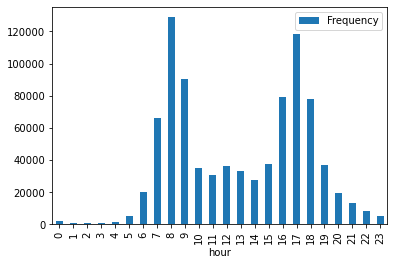

In [12]:
hourly_weekday_df.plot.bar(x='hour', y='Frequency')

Above is a histogram to visualize the trip start time distribution.

In [14]:
%%bigquery commuter_df

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE ((CAST(start_date AS time) BETWEEN '06:00:00' AND '10:59:59') 
    OR (CAST(start_date AS time) BETWEEN '16:00:00' AND '19:59:59'))
    AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
    AND duration_sec BETWEEN 120 AND 50400
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

In [15]:
commuter_df

,start_station_name,end_station_name,trip_freq
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6348
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,5647
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5454
3,Embarcadero at Sansome,Steuart at Market,5217
4,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),5191


The table above shows the 5 most popular commuter trips. The stations of these most frequent trips   makes sense because many commuters are expected to leave/enter the city via Caltrain, Bart, or Ferry.

### Question 2: What are your recommendations for offers?

#### Recommendation 1: Target Other Commuters
Targeting commuters who drive and trying to entice them to bike will be a hard task, so I suggest not to take that approach. Looking at the commuter trip table **above**, we can see that many commuters take the Caltrain, Bart, or Ferry. The table only represents commuters who have already used bike share to get between their workplaces and the Caltrain/Bart/Ferry stations. There are other commuters who take Caltrain/Bart/Ferry, but are walking, taking rideshare, or taking the bus to and from their workplaces. There are opportunies to entice these other commuters because walking takes longer, busses aren't always reliable and are crowded furing rush hour, and rideshare is more expensive and less eco-friendly. Offer a discount to commuters and market the benefits of switching to bike share.

#### Recommendation 2: Weekend Exploration for Commuters

What percentage of commuters trips are taken by subscribers? This next query gives the number of commuter trips taken by subcribers.

In [16]:
%%bigquery

SELECT count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE ((CAST(start_date AS time) BETWEEN '06:00:00' AND '10:59:59') 
    OR (CAST(start_date AS time) BETWEEN '16:00:00' AND '19:59:59'))
    AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
    AND duration_sec BETWEEN 120 AND 50400
    AND subscriber_type = "Subscriber"

,trip_freq
0,607955


The previous query gives the total number of commuter trips. Therefore, about 94% of commuter trips are taken by subscribers.

Question 9: What are the most common start station and end station pairs on the weekdays for subscribers?

In [29]:
%%bigquery weekday_pairs_sub_df

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE subscriber_type='Subscriber' AND (EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6)
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

In [30]:
weekday_pairs_sub_df

,start_station_name,end_station_name,trip_freq
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,7870
1,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6655
2,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6322
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6070
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),6028


The table above shows the most common trips on weekdays for commuters. We see the `San Francisco Caltrain (Townsend at 4th)` station in 3 of the top 5 trips. But `San Francisco Caltrain (Townsend at 4th)` station does not show up in the top weekend trips (Question 8):

In [25]:
%%bigquery weekend_trips_df

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE EXTRACT(DAYOFWEEK FROM start_date) = 1 OR EXTRACT(DAYOFWEEK FROM start_date) = 7
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 10

In [26]:
weekend_trips_df

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,2078
1,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1183
2,Embarcadero at Sansome,Embarcadero at Sansome,1146
3,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),1122
4,Embarcadero at Bryant,Embarcadero at Sansome,701
5,Embarcadero at Bryant,Harry Bridges Plaza (Ferry Building),612
6,Embarcadero at Vallejo,Embarcadero at Sansome,603
7,University and Emerson,University and Emerson,599
8,2nd at Townsend,Harry Bridges Plaza (Ferry Building),577
9,Powell Street BART,Market at 10th,564


The table above displays the top 10 weekend trips. The `San Francisco Caltrain (Townsend at 4th)` station does not show up in the table. Lets do some more exploration. 

In [37]:
%%bigquery caltrain_df

SELECT EXTRACT(DAYOFWEEK FROM start_date) as day, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE start_station_name = 'San Francisco Caltrain (Townsend at 4th)' 
    OR end_station_name = 'San Francisco Caltrain (Townsend at 4th)'
GROUP BY day
ORDER BY day

In [39]:
caltrain_df['day']= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [40]:
caltrain_df

,day,trip_freq
0,Sunday,3585
1,Monday,30342
2,Tuesday,33745
3,Wednesday,33107
4,Thursday,31790
5,Friday,27180
6,Saturday,4244


<AxesSubplot:xlabel='day'>

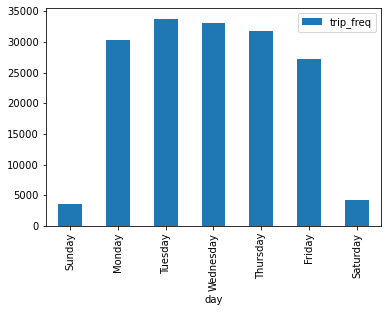

In [44]:
caltrain_df.plot.bar(x='day', y='trip_freq')

The table above shows the frequency of trips to or from the `San Francisco Caltrain (Townsend at 4th)` station for the different days of the week. Bike share trips to or from the `San Francisco Caltrain (Townsend at 4th)` station occur about 8 times more per day during the weekdays than on the weekends. This means that a lot of people come in and leave the city on the weekdays for work, but these people are not doing the same on the weekends. We can offer weekend deals for people who ride on the weekdays. Because most commuters are subscribers, we can attract more people if we offer deals to family of the subscribers on the weekend. We can also compile lists of fun things to do in San Francisco and the Southbay. This will incentivize people to take trips to or out of San Francisco during the weekend and explore places they don't get to on the weekdays.

In [49]:
#### Recommendation 3: Weekend Subscription Deal for Locals

In [45]:
%%bigquery weekend_sub_df

SELECT subscriber_type, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE EXTRACT(DAYOFWEEK FROM start_date) = 1 OR EXTRACT(DAYOFWEEK FROM start_date) = 7
GROUP BY subscriber_type

In [48]:
weekend_sub_df

,subscriber_type,trip_freq
0,Customer,55152
1,Subscriber,56502


<AxesSubplot:xlabel='subscriber_type'>

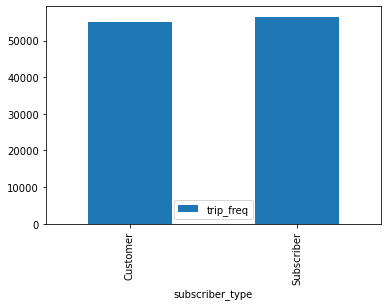

In [47]:
weekend_sub_df.plot.bar(x='subscriber_type', y='trip_freq')

The histogram and table above shows the number of trips by subscribers and non-subscribers on the weekends. It is about half and half, so there is definitely potential to attract more riders and subscribers on the weekend. We can offer a special weekend subscription deal for locals.